## Titanic Classification - EDA, Data PP, and Models

## Intro:
This notebook captures a modeling process for the Titanic Classification challenge on Kaggle. Exploratory data analysis, preprocessing, and model selection is included. 

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
# import files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [76]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


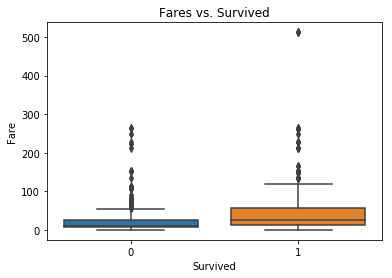

In [78]:
# Look at fares vs. survived via boxplot
sns.boxplot(x=train['Survived'], y=train['Fare'])
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Fares vs. Survived')
plt.show()

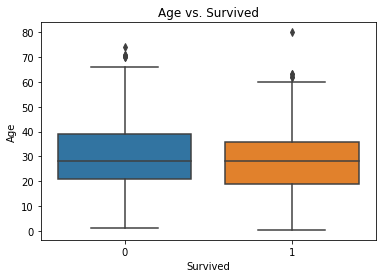

In [79]:
# Look at age vs. survived via boxplot
sns.boxplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age vs. Survived')
plt.show()

In [80]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [81]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [82]:
m_f_surv = train[['Survived', 'Sex']].groupby('Sex').sum()

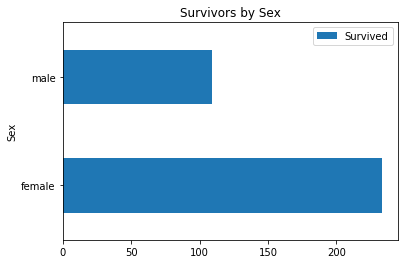

In [83]:
m_f_surv.plot(kind = 'barh', title = 'Survivors by Sex')
plt.show()

In [84]:
no_fare = train['Fare'] == 0
nfare = train[no_fare]
nfare.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,15.000000,15.000000,15.000000,7.000000,15.0,15.0,15.0
mean,516.400000,0.066667,1.933333,35.142857,0.0,0.0,0.0
std,225.808958,0.258199,0.798809,10.023781,0.0,0.0,0.0
min,180.000000,0.000000,1.000000,19.000000,0.0,0.0,0.0
25%,290.500000,0.000000,1.000000,30.500000,0.0,0.0,0.0
50%,482.000000,0.000000,2.000000,38.000000,0.0,0.0,0.0
75%,704.000000,0.000000,2.500000,39.500000,0.0,0.0,0.0
max,823.000000,1.000000,3.000000,49.000000,0.0,0.0,0.0


In [85]:
embark = train[['Embarked', 'Survived']].groupby('Embarked').sum()

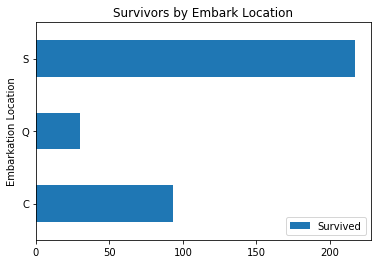

In [86]:
embark.plot(kind = 'barh', title = 'Survivors by Embark Location')
plt.ylabel('Embarkation Location')
plt.show()

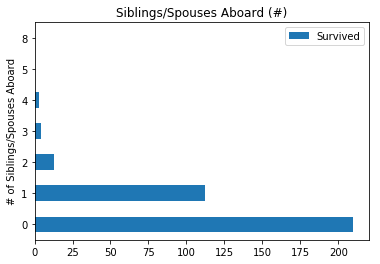

In [87]:
sibs = train[['SibSp', 'Survived']].groupby('SibSp').sum()
sibs.plot(kind = 'barh', title='Siblings/Spouses Aboard (#)')
plt.ylabel('# of Siblings/Spouses Aboard')
plt.show()

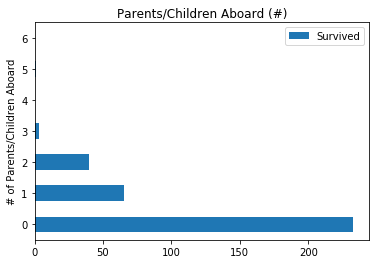

In [88]:
pc = train[['Parch', 'Survived']].groupby('Parch').sum()
pc.plot(kind = 'barh', title='Parents/Children Aboard (#)')
plt.ylabel('# of Parents/Children Aboard')
plt.show()

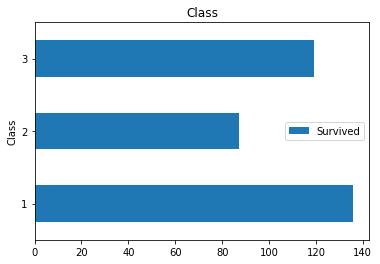

In [89]:
cls = train[['Pclass', 'Survived']].groupby('Pclass').sum()
cls.plot(kind = 'barh', title='Class')
plt.ylabel('Class')
plt.show()

## EDA Summary:
Sex, embark location, family members being aboard, class, and fare amount appear to be sufficient predictors for survival.

## Data Preprocessing

In [90]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
# Create dummmies for embarkation location, sex, and passenger class
emb_dums = pd.get_dummies(train['Embarked'])
sex_dums = pd.get_dummies(train['Sex'])
tst_emb_dums = pd.get_dummies(test['Embarked'])
tst_sex_dums = pd.get_dummies(test['Sex'])
cls_dums = pd.get_dummies(train['Pclass'], prefix = 'cl')
tst_cls_dums = pd.get_dummies(test['Pclass'], prefix = 'cl')

In [92]:
train = pd.concat([train,emb_dums,sex_dums, cls_dums],axis=1)
test = pd.concat([test, tst_emb_dums, tst_sex_dums, tst_cls_dums], axis = 1)

In [93]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,cl_1,cl_2,cl_3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


In [94]:
train.drop(['Name','Sex','Ticket','Cabin','Embarked','Pclass'],axis=1,inplace=True)
test.drop(['Name','Sex','Ticket','Cabin','Embarked','Pclass'],axis=1,inplace=True)

In [95]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,cl_1,cl_2,cl_3
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [96]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,C,Q,S,female,male,cl_1,cl_2,cl_3
0,892,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


In [97]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,C,Q,S,female,male,cl_1,cl_2,cl_3
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,1,0,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [98]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
cl_1           891 non-null uint8
cl_2           891 non-null uint8
cl_3           891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.8 KB


In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
female         418 non-null uint8
male           418 non-null uint8
cl_1           418 non-null uint8
cl_2           418 non-null uint8
cl_3           418 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [100]:
# Fill nan
train['Age'].fillna((train['Age'].mean()), inplace=True)
test['Age'].fillna((test['Age'].mean()), inplace=True)
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
cl_1           891 non-null uint8
cl_2           891 non-null uint8
cl_3           891 non-null uint8
dtypes: float64(2), int64(4), uint8(8)
memory usage: 48.8 KB


In [102]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
C              418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
female         418 non-null uint8
male           418 non-null uint8
cl_1           418 non-null uint8
cl_2           418 non-null uint8
cl_3           418 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 19.7 KB


In [103]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,C,Q,S,female,male,cl_1,cl_2,cl_3
0,892,34.5,0,0,7.8292,0,1,0,0,1,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1


## KNN

In [112]:
# Train/test data
X = train[['Age','SibSp','Parch','Fare','C','Q','S','female','male','cl_1','cl_2','cl_3']]#.values
Y = train['Survived']#.values

In [113]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)

In [115]:
#Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [35]:
# Fitting classifier to the Trng set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
# Predicting a new result
y_pred = classifier.predict(X_test) 

In [37]:
# Make the confusion matrix - evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) # Y_test is actual values, y_pred is predicted vals
cm

array([[96, 14],
       [23, 46]], dtype=int64)

## Random Forest

In [38]:
# Fitting Rand Forest to the Trng set
from sklearn.ensemble import RandomForestClassifier
# Create Classifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
# Predicting a new result
y_pred = classifier.predict(X_test) 

In [40]:
# Make the confusion matrix - evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) # Y_test is actual values, y_pred is predicted vals
cm

array([[102,   8],
       [ 25,  44]], dtype=int64)

## Naive Bayes

In [41]:
# Fitting Naive Bayes to the Trng set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [42]:
# Predicting a new result
y_pred = classifier.predict(X_test) 

In [43]:
# Make the confusion matrix - evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) # Y_test is actual values, y_pred is predicted vals
cm

array([[89, 21],
       [15, 54]], dtype=int64)

## Kernel SVM Classification (Choice Model)

In [123]:
# Fitting SVM to the Trng set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [124]:
# Predicting a new result
y_pred = classifier.predict(X_test) 

In [125]:
# Make the confusion matrix - evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) # Y_test is actual values, y_pred is predicted vals
cm

array([[103,   7],
       [ 25,  44]], dtype=int64)

In [126]:
prediction = test[['Age','SibSp','Parch','Fare','C','Q','S','female','male','cl_1','cl_2','cl_3']].values

In [127]:
#Feature Scaling 
tst_x = StandardScaler()
pred = tst_x.fit_transform(prediction)

In [128]:
a = classifier.predict(pred)
a

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [130]:
test['Survived'] = a
# test = pd.concat([test, a], axis = 1)
test.head(10)

,PassengerId,Age,SibSp,Parch,Fare,C,Q,S,female,male,cl_1,cl_2,cl_3,Survived
0,892,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,47.0,1,0,7.0000,0,0,1,1,0,0,0,1,0
2,894,62.0,0,0,9.6875,0,1,0,0,1,0,1,0,0
3,895,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,22.0,1,1,12.2875,0,0,1,1,0,0,0,1,0
5,897,14.0,0,0,9.2250,0,0,1,0,1,0,0,1,0
6,898,30.0,0,0,7.6292,0,1,0,1,0,0,0,1,1
7,899,26.0,1,1,29.0000,0,0,1,0,1,0,1,0,0
8,900,18.0,0,0,7.2292,1,0,0,1,0,0,0,1,1
9,901,21.0,2,0,24.1500,0,0,1,0,1,0,0,1,0


In [131]:
test = test[['PassengerId','Survived']]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [133]:
test.to_csv('titanicMM.csv', index=False)

## Logistic Regression

In [47]:
# Fitting Log Reg to the dataset
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Predicting a new result
y_pred = classifier.predict(X_test) 

In [49]:
# Make the confusion matrix - evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred) # Y_test is actual values, y_pred is predicted vals
cm

array([[97, 13],
       [20, 49]], dtype=int64)

## Conclusion
Based on the confusion matrices, the Kernel SVM performed best at ~82% accuracy. Further exprimentation should focus on hyperparameter tuning, especially for the random forest, or neural network classifiers. 